<a href="https://colab.research.google.com/github/rareTYPErelease/Armark-Fashion-Shopping-Webpage/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
diabetes= pd.read_csv('/content/diabetes.csv')
diabetes.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
print(diabetes.shape)
print(diabetes.info())
print(diabetes.describe())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479  

In [7]:
missing_values = diabetes.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
print(diabetes.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


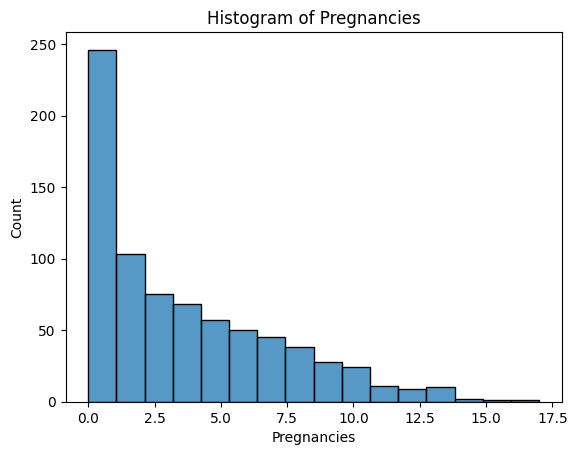

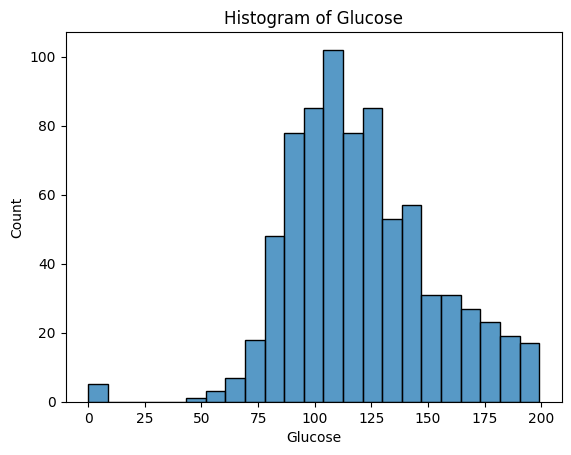

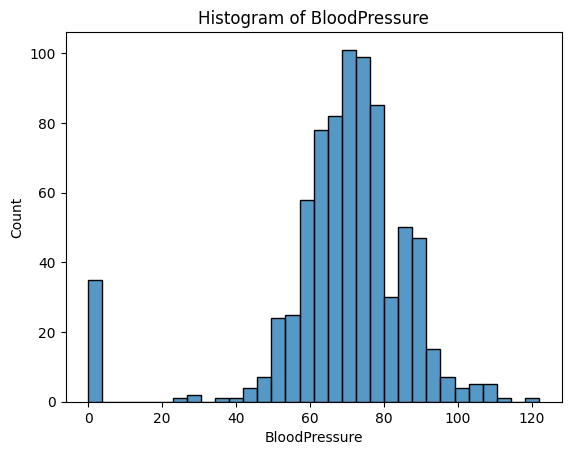

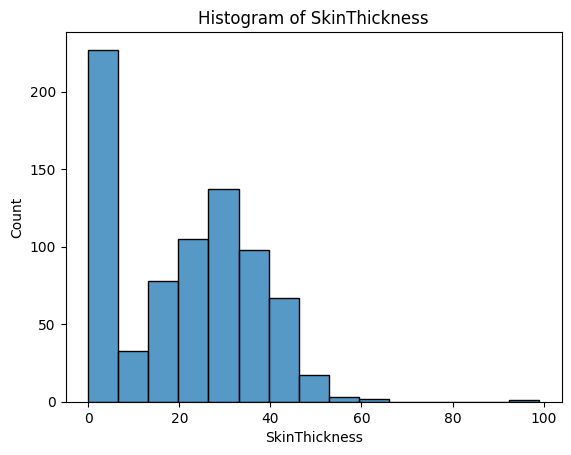

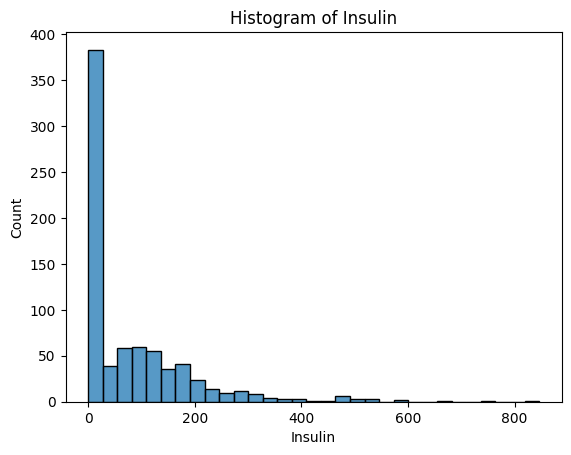

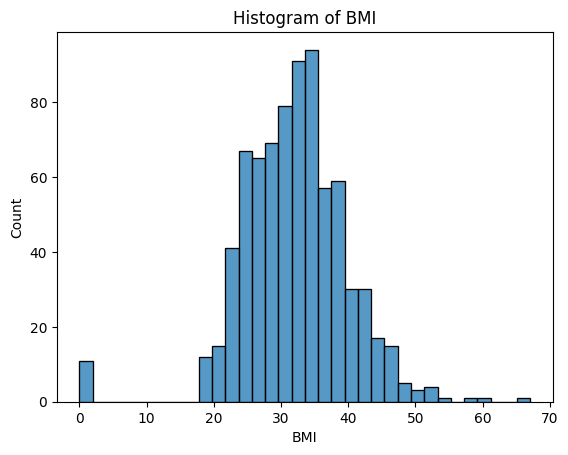

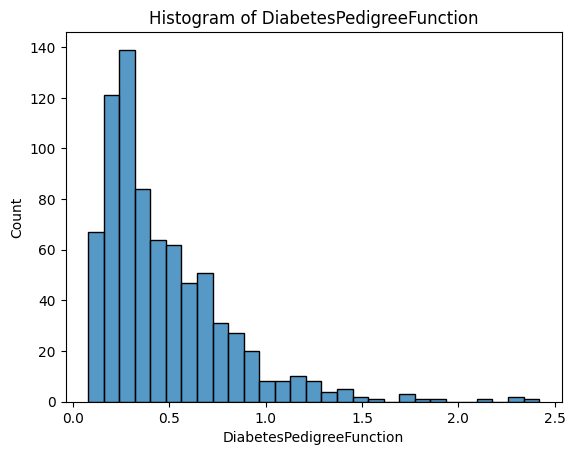

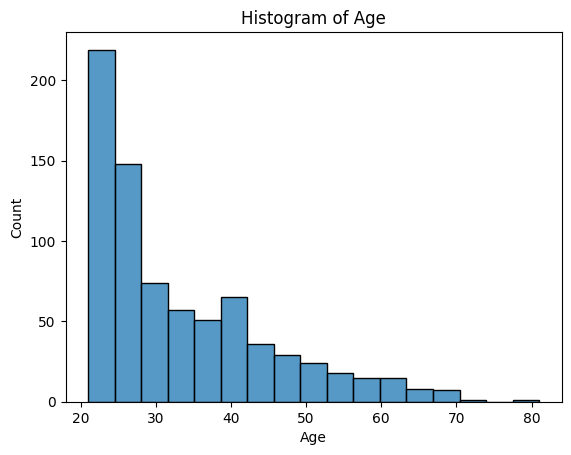

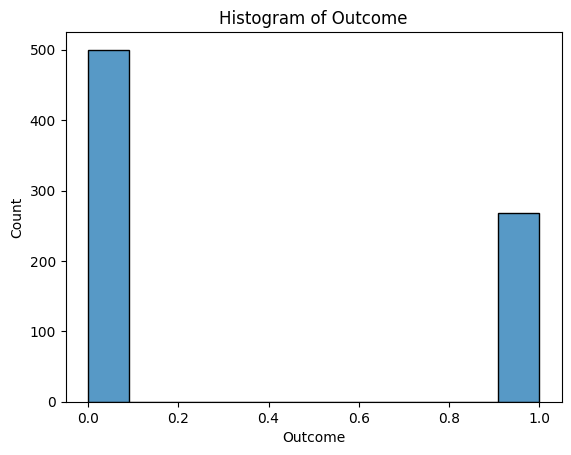

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
#checking distribution
for column in diabetes.columns:
    plt.figure()
    sns.histplot(diabetes[column])
    plt.title(f"Histogram of {column}")
    plt.show()

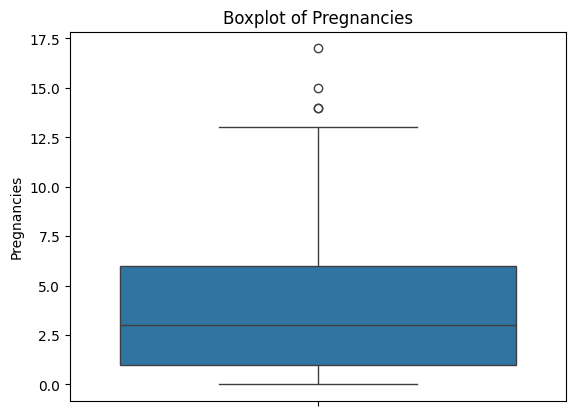

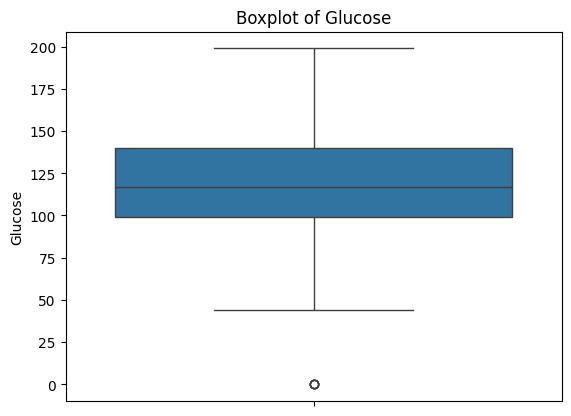

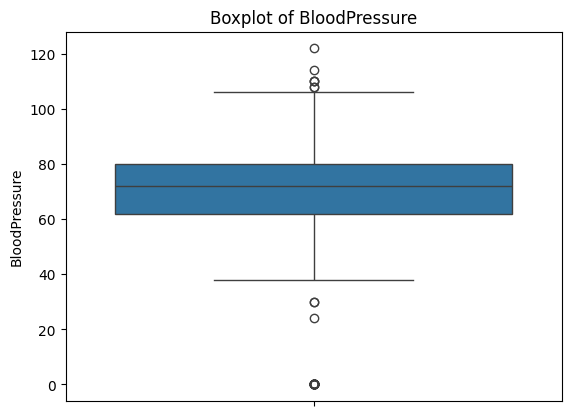

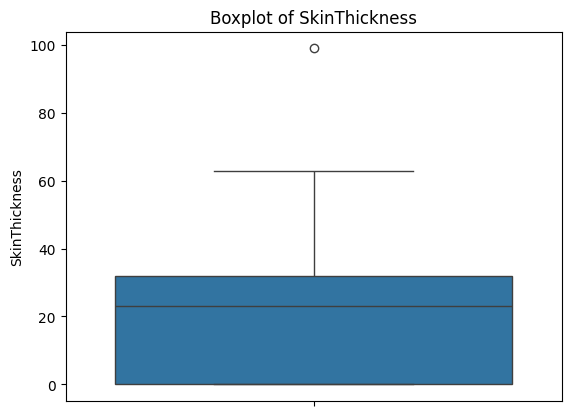

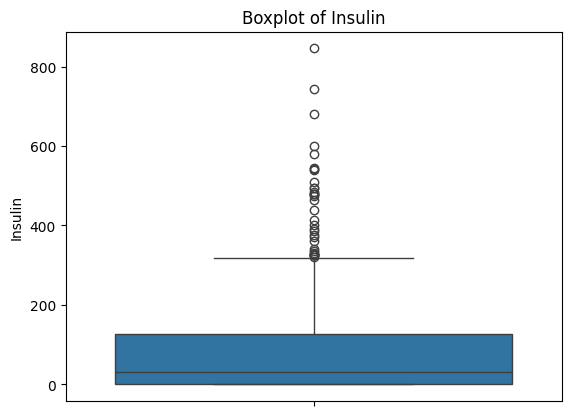

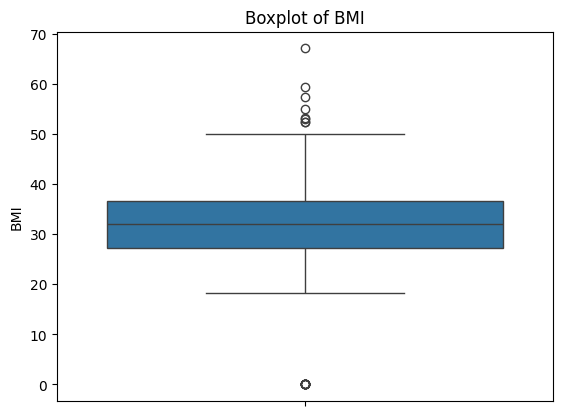

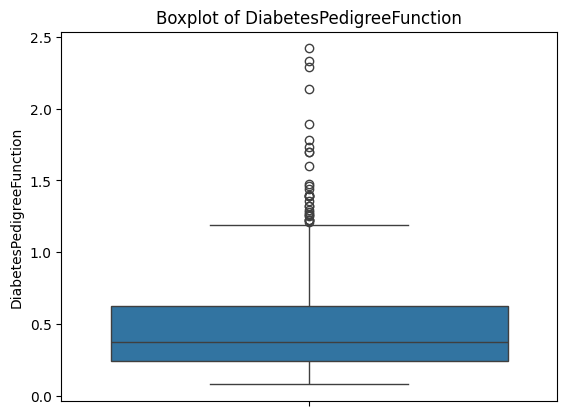

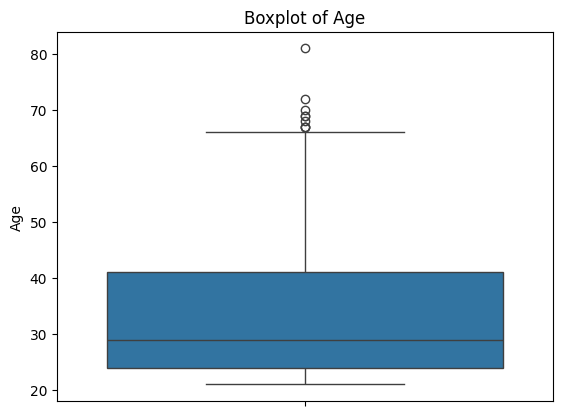

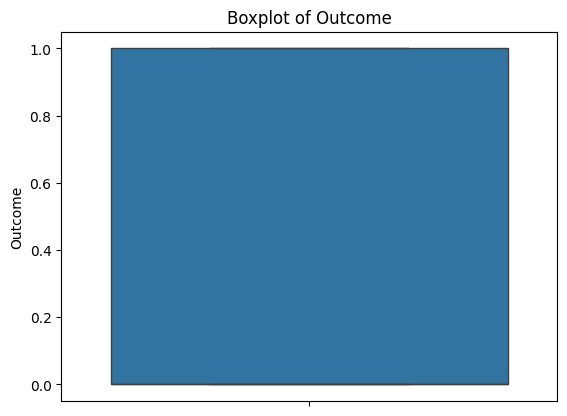

In [13]:
#Outliers
for column in diabetes.columns:
    if diabetes[column].dtype in ['int64', 'float64']:
        plt.figure()
        sns.boxplot(diabetes[column])
        plt.title(f"Boxplot of {column}")
        plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

# scalling
numerical_cols = diabetes.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(diabetes[numerical_cols])

In [19]:
#Fill Missing Values
import numpy as np
diabetes = diabetes.replace({0:np.nan})

In [20]:
# Convert the nulls into the mean or median value
diabetes = diabetes.fillna(diabetes.mean())

In [25]:
# KNN
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
dataset = load_iris()
X, y = dataset.data, dataset.target

knn = KNeighborsClassifier(n_neighbors=3)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(knn, X, y, cv=kf)
print(f"KNN Cross-Validation Scores: {scores}")
print(f"Mean Score: {scores.mean()}")

KNN Cross-Validation Scores: [1.         0.96666667 0.96666667 0.93333333 0.96666667]
Mean Score: 0.9666666666666668


In [27]:
# DECISION TREE
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

dataset = load_iris()
X, y = dataset.data, dataset.target

decision_tree = DecisionTreeClassifier(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(decision_tree, X, y, cv=kf)
print(f"Decision Tree Cross-Validation Scores: {scores}")
print(f"Mean Score: {scores.mean()}")

Decision Tree Cross-Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Mean Score: 0.9533333333333335


The dataset has 768 rows and 9 columns.

---


The dataset consists of 7 integer columns and 2 float columns.

---


Many features have a significant number of zero values.

---


The KNN classifier was evaluated using 5-fold cross-validation.

---


The cross-validation scores ranged from 0.933 to 1.0, with a mean score of approximately 0.967.

---


This suggests that the KNN classifier performs well on the dataset, with high accuracy and relatively low variance in performance across different folds.

---



The Decision Tree classifier was also evaluated using 5-fold cross-validation.


---


The cross-validation scores ranged from 0.933 to 1.0, with a mean score of approximately 0.953.

---


Both KNN and Decision Tree classifiers performed well, with KNN slightly outperforming Decision Tree in terms of mean accuracy.

In [29]:
diabetes.to_csv('/content/diabetes.csv', index=False)
from google.colab import files
files.download('/content/diabetes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>